In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 2:
                selectivity_average = ast.literal_eval(line)
            if i == 3:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [5]:
def val_extractor(optmizer_name):
    sparsity_con1  = sparsity_val_extractor(f'sparsity_selectivity_batchsize_1_50_{optmizer_name}.txt')
    sparsity_con5  = sparsity_val_extractor(f'5subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    sparsity_con10 = sparsity_val_extractor(f'10subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    
    selectivity_con1_avg, selectivity_con1_std   = selectivity_val_extractor(f'sparsity_selectivity_batchsize_1_50_{optmizer_name}.txt')
    selectivity_con5_avg, selectivity_con5_std   = selectivity_val_extractor(f'5subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    selectivity_con10_avg, selectivity_con10_std = selectivity_val_extractor(f'10subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    
    test_con1 = test_val_extractor(f'sparsity_selectivity_batchsize_1_50_{optmizer_name}.txt')
    test_con5 = test_val_extractor(f'5subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    test_con10 = test_val_extractor(f'10subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    
    return test_con1, sparsity_con1, selectivity_con1_avg, selectivity_con1_std, test_con5, sparsity_con5, selectivity_con5_avg, selectivity_con5_std, test_con10, sparsity_con10, selectivity_con10_avg, selectivity_con10_std

In [6]:
con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10 = val_extractor('SGD')  

# Graph

[]

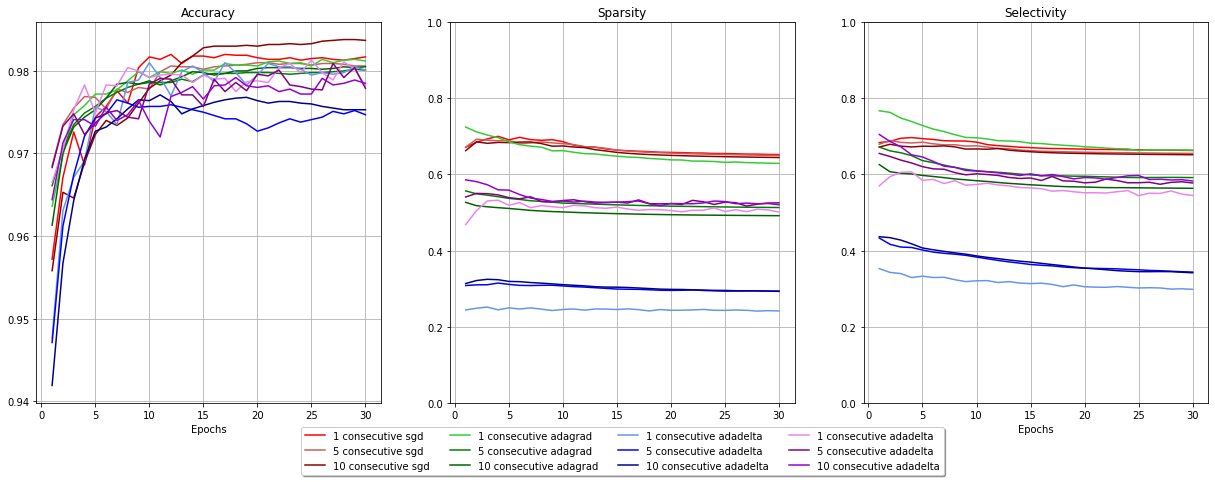

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,7))

# accuracy plot 
con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10 = val_extractor('SGD')  

ax1.plot(np.linspace(1,30,30), con1, label='1 consecutive sgd', color='red')
ax1.plot(np.linspace(1,30,30), con5, label='5 consecutives sgd', color='indianred')
ax1.plot(np.linspace(1,30,30), con10, label='10 consecutives sgd', color='darkred')

ax2.plot(np.linspace(1,30,30), spar_con1, label='1 consecutive sgd', color='red')
ax2.plot(np.linspace(1,30,30), spar_con5, label='5 consecutives sgd', color='indianred')
ax2.plot(np.linspace(1,30,30), spar_con10, label='10 consecutives sgd', color='darkred')

ax3.plot(np.linspace(1,30,30), selec_avg_con1, label='1 consecutive sgd', color='red')
ax3.plot(np.linspace(1,30,30), selec_avg_con5, label='5 consecutive sgd', color='indianred')
ax3.plot(np.linspace(1,30,30), selec_avg_con10, label='10 consecutive sgd', color='darkred')

con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10 = val_extractor('Adagrad')  

ax1.plot(np.linspace(1,30,30), con1, label='1 consecutive adagrad', color='limegreen')
ax1.plot(np.linspace(1,30,30), con5, label='5 consecutives adagrad', color='green')
ax1.plot(np.linspace(1,30,30), con10, label='10 consecutives adagrad', color='darkgreen')

ax2.plot(np.linspace(1,30,30), spar_con1, label='1 consecutive adagrad', color='limegreen')
ax2.plot(np.linspace(1,30,30), spar_con5, label='5 consecutives adagrad', color='green')
ax2.plot(np.linspace(1,30,30), spar_con10, label='10 consecutives adagrad', color='darkgreen')

ax3.plot(np.linspace(1,30,30), selec_avg_con1, label='1 consecutive adagrad', color='limegreen')
ax3.plot(np.linspace(1,30,30), selec_avg_con5, label='5 consecutive adagrad', color='green')
ax3.plot(np.linspace(1,30,30), selec_avg_con10, label='10 consecutive adagrad', color='darkgreen')

con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10 = val_extractor('Adadelta')  

ax1.plot(np.linspace(1,30,30), con1, label='1 consecutive adadelta', color='cornflowerblue')
ax1.plot(np.linspace(1,30,30), con5, label='5 consecutives adadelta', color='blue')
ax1.plot(np.linspace(1,30,30), con10, label='10 consecutives adadelta', color='darkblue')

ax2.plot(np.linspace(1,30,30), spar_con1, label='1 consecutive adadelta', color='cornflowerblue')
ax2.plot(np.linspace(1,30,30), spar_con5, label='5 consecutives adadelta', color='blue')
ax2.plot(np.linspace(1,30,30), spar_con10, label='10 consecutives adadelta', color='darkblue')

ax3.plot(np.linspace(1,30,30), selec_avg_con1, label='1 consecutive adadelta', color='cornflowerblue')
ax3.plot(np.linspace(1,30,30), selec_avg_con5, label='5 consecutive adadelta', color='blue')
ax3.plot(np.linspace(1,30,30), selec_avg_con10, label='10 consecutive adadelta', color='darkblue')

con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10 = val_extractor('Adam')  

ax1.plot(np.linspace(1,30,30), con1, label='1 consecutive adadelta', color='violet')
ax1.plot(np.linspace(1,30,30), con5, label='5 consecutives adadelta', color='purple')
ax1.plot(np.linspace(1,30,30), con10, label='10 consecutives adadelta', color='darkviolet')

ax2.plot(np.linspace(1,30,30), spar_con1, label='1 consecutive adadelta', color='violet')
ax2.plot(np.linspace(1,30,30), spar_con5, label='5 consecutives adadelta', color='purple')
ax2.plot(np.linspace(1,30,30), spar_con10, label='10 consecutives adadelta', color='darkviolet')

ax3.plot(np.linspace(1,30,30), selec_avg_con1, label='1 consecutive adadelta', color='violet')
ax3.plot(np.linspace(1,30,30), selec_avg_con5, label='5 consecutive adadelta', color='purple')
ax3.plot(np.linspace(1,30,30), selec_avg_con10, label='10 consecutive adadelta', color='darkviolet')

ax1.grid()
ax2.grid()
ax3.grid()

ax1.set_title('Accuracy')
ax2.set_title('Sparsity')
ax3.set_title('Selectivity')

ax1.set_xlabel('Epochs')
ax3.set_xlabel('Epochs')

ax2.set_ylim([0, 1])
ax3.set_ylim([0, 1])

ax3.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.05),
          fancybox=True, shadow=True, ncol=4)

plt.plot()
